# Analise exploratória

Imports e leitura dos dados

In [123]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='notebook', palette='colorblind')
data = pd.read_csv('https://www.dropbox.com/s/zyphbksidlfefze/DEF_NaoLigamosParaAG_FullData.csv?dl=1', sep=",")

Explorando a forma dos dados

In [124]:
data.shape

(10000, 23)

In [125]:
data.head()

,loja,nro_pessoas,periodo_visita,sexo_negociante,idade_negociante,cor_cabelo_negociante,gesticula_negociante,vestimenta_negociante,valor_primeiro_carro,valor_segundo_carro,valor_carro_comprado,ano_primeiro_carro,ano_segundo_carro,ano_carro_comprado,cor_primeiro_carro,cor_segundo_carro,cor_carro_comprado,tipo_primeiro_carro,tipo_segundo_carro,tipo_carro_comprado,tempo_atendimento,n_carros_vistos,entrou_nos_carros
0,2,1,Matutino,F,"[25, 40)",Ruivo,False,Mal-arrumado,83520,59400.0,NaN,2017,2018.0,NaN,Preto,Vermelho,NaN,SUV,Hatch,NaN,36.426679,3,True
1,1,5,Matutino,M,"[25, 40)",Preto,True,Normal,103320,45720.0,NaN,2012,2002.0,NaN,Branco,Branco,NaN,Hatch,Hatch,NaN,3.709804,1,True
2,2,1,Matutino,F,"[18, 25)",Ruivo,False,Bem-arrumado,59640,NaN,NaN,2018,NaN,NaN,Preto,NaN,NaN,SUV,NaN,NaN,26.161509,2,True
3,2,2,Vespertino,M,"[18, 25)",Loiro,True,Normal,61680,88560.0,91440.0,2018,2018.0,2007.0,Branco,Branco,Vermelho,SUV,Hatch,Sedan,41.336284,3,False
4,2,5,Matutino,M,"[40, 100)",Preto,True,Normal,92640,56400.0,NaN,2012,2014.0,NaN,Preto,Azul,NaN,SUV,SUV,NaN,10.713265,4,False


In [126]:
data.describe()

,loja,nro_pessoas,valor_primeiro_carro,valor_segundo_carro,valor_carro_comprado,ano_primeiro_carro,ano_segundo_carro,ano_carro_comprado,tempo_atendimento,n_carros_vistos
count,10000.000000,10000.000000,10000.000000,6790.000000,2469.000000,10000.000000,6790.000000,2469.000000,10000.000000,10000.000000
mean,1.503300,2.173700,77888.184000,77334.698085,78634.264885,2010.409100,2010.510162,2009.703524,27.381107,2.495700
std,0.500014,1.097656,19097.500008,19018.901011,18906.389704,5.441645,5.428939,5.501251,14.371625,1.126636
min,1.000000,1.000000,29400.000000,29400.000000,29400.000000,2000.000000,2000.000000,2000.000000,3.002703,1.000000
25%,1.000000,1.000000,62040.000000,61680.000000,63000.000000,2006.000000,2006.000000,2005.000000,15.529965,1.000000
50%,2.000000,2.000000,78360.000000,77760.000000,79560.000000,2011.000000,2011.000000,2010.000000,27.806875,2.000000
75%,2.000000,2.000000,93120.000000,91680.000000,93360.000000,2015.000000,2015.000000,2015.000000,37.003401,4.000000
max,2.000000,5.000000,115200.000000,115200.000000,115200.000000,2018.000000,2018.000000,2018.000000,59.998387,4.000000


Devido à natureza dos dados, há alguns valores ausentes

Das 10000 instâncias, 3210 não tem as propriedades referentes ao segundo carro, indicando que 3210 pessoas olharam apenas um carro;

Além disso, 7531 instâncias não tem propriedades referentes ao carro comprado, indicando que 7531 pessoas não compraram nenhum carro.

In [127]:
data.isnull().sum()

loja                        0
nro_pessoas                 0
periodo_visita              0
sexo_negociante             0
idade_negociante            0
cor_cabelo_negociante       0
gesticula_negociante        0
vestimenta_negociante       0
valor_primeiro_carro        0
valor_segundo_carro      3210
valor_carro_comprado     7531
ano_primeiro_carro          0
ano_segundo_carro        3210
ano_carro_comprado       7531
cor_primeiro_carro          0
cor_segundo_carro        3210
cor_carro_comprado       7531
tipo_primeiro_carro         0
tipo_segundo_carro       3210
tipo_carro_comprado      7531
tempo_atendimento           0
n_carros_vistos             0
entrou_nos_carros           0
dtype: int64

Adicionaremos a propriedade _carro_foi_comprado_, booleano indicando se o carro foi comprado. Talvez esse atributo será útil mais à frente.

In [128]:
data['carro_foi_comprado'] = data.apply(lambda x: not math.isnan(x['valor_carro_comprado']),axis=1)

In [129]:
# Ver colunas por tipo de dado
types = ['number', 'bool', 'object']

for t in types:
    print(t)
    cols = data.select_dtypes(include=[t]).columns
    for c in cols:
        print('\t', c)
    print('______________________________')

number
	 loja
	 nro_pessoas
	 valor_primeiro_carro
	 valor_segundo_carro
	 valor_carro_comprado
	 ano_primeiro_carro
	 ano_segundo_carro
	 ano_carro_comprado
	 tempo_atendimento
	 n_carros_vistos
______________________________
bool
	 gesticula_negociante
	 entrou_nos_carros
	 carro_foi_comprado
______________________________
object
	 periodo_visita
	 sexo_negociante
	 idade_negociante
	 cor_cabelo_negociante
	 vestimenta_negociante
	 cor_primeiro_carro
	 cor_segundo_carro
	 cor_carro_comprado
	 tipo_primeiro_carro
	 tipo_segundo_carro
	 tipo_carro_comprado
______________________________


A partir de agora, seguiremos propondo diversas questões, e buscando respostas para elas nos dados. Vale notar que esse é um trabalho de **exploração**, então nem sempre as respostas trarão informações relevantes

### Tipo, idade e cor do carro afeta o preço? Como?
Para responder esas pergunta, faremos um boxplot do preço em função do tipo de carro, e outro do preço em função da cor do carro.
O carro escolhido para essa análise é o primeiro carro, porque é o único que não tem valores ausentes.

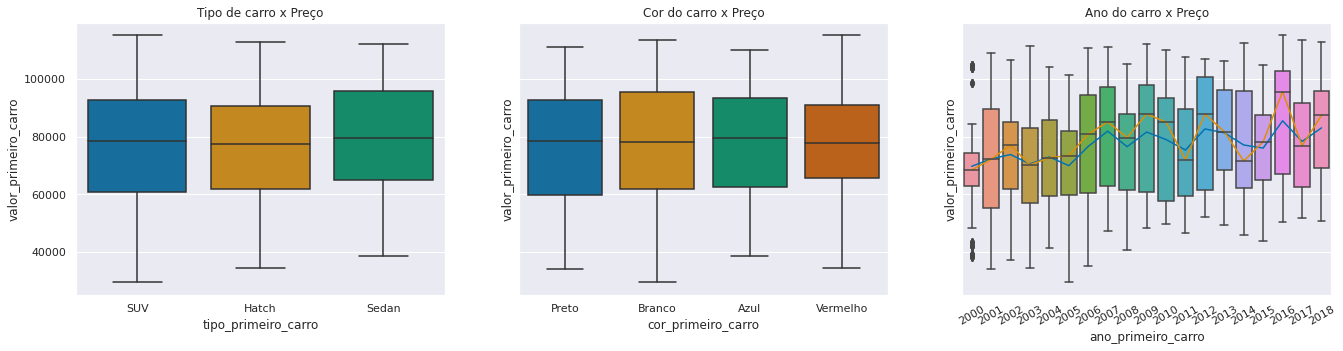

In [130]:
fix, axes = plt.subplots(1, 3, sharey=True, figsize=(22.5,5))

# TIPO
sns.boxplot(x='tipo_primeiro_carro', y='valor_primeiro_carro', data=data, ax=axes[0])
axes[0].set_title('Tipo de carro x Preço')

# COR
sns.boxplot(x='cor_primeiro_carro', y='valor_primeiro_carro', data=data, ax=axes[1])
axes[1].set_title('Cor do carro x Preço')


# ANO - no caso do ano, seria interessante observar alguma tendência que indica como o preço varia ao longos dos anos
# Por isso, plotamos também a média e mediana.
sns.boxplot(x='ano_primeiro_carro', y='valor_primeiro_carro', data=data, ax=axes[2])

a = data.groupby('ano_primeiro_carro')['valor_primeiro_carro'].mean()
axes[2].plot(a.values)

m = data.groupby('ano_primeiro_carro')['valor_primeiro_carro'].median()
axes[2].plot(m.values)

axes[2].set_title('Ano do carro x Preço')
axes[2].tick_params(rotation=30)

A média dos preços são mais ou menos consistente entre as cores e entre os tipos. Existe alguma diferença, mas pode ser só algum tipo de flutuação estatística. Por isso, iremos descartar essa informação.

Por outro lado, no caso do ano, existe um indício de que carros mais novos são mais valorizados. Vamos explorar essa informação mais adiante.

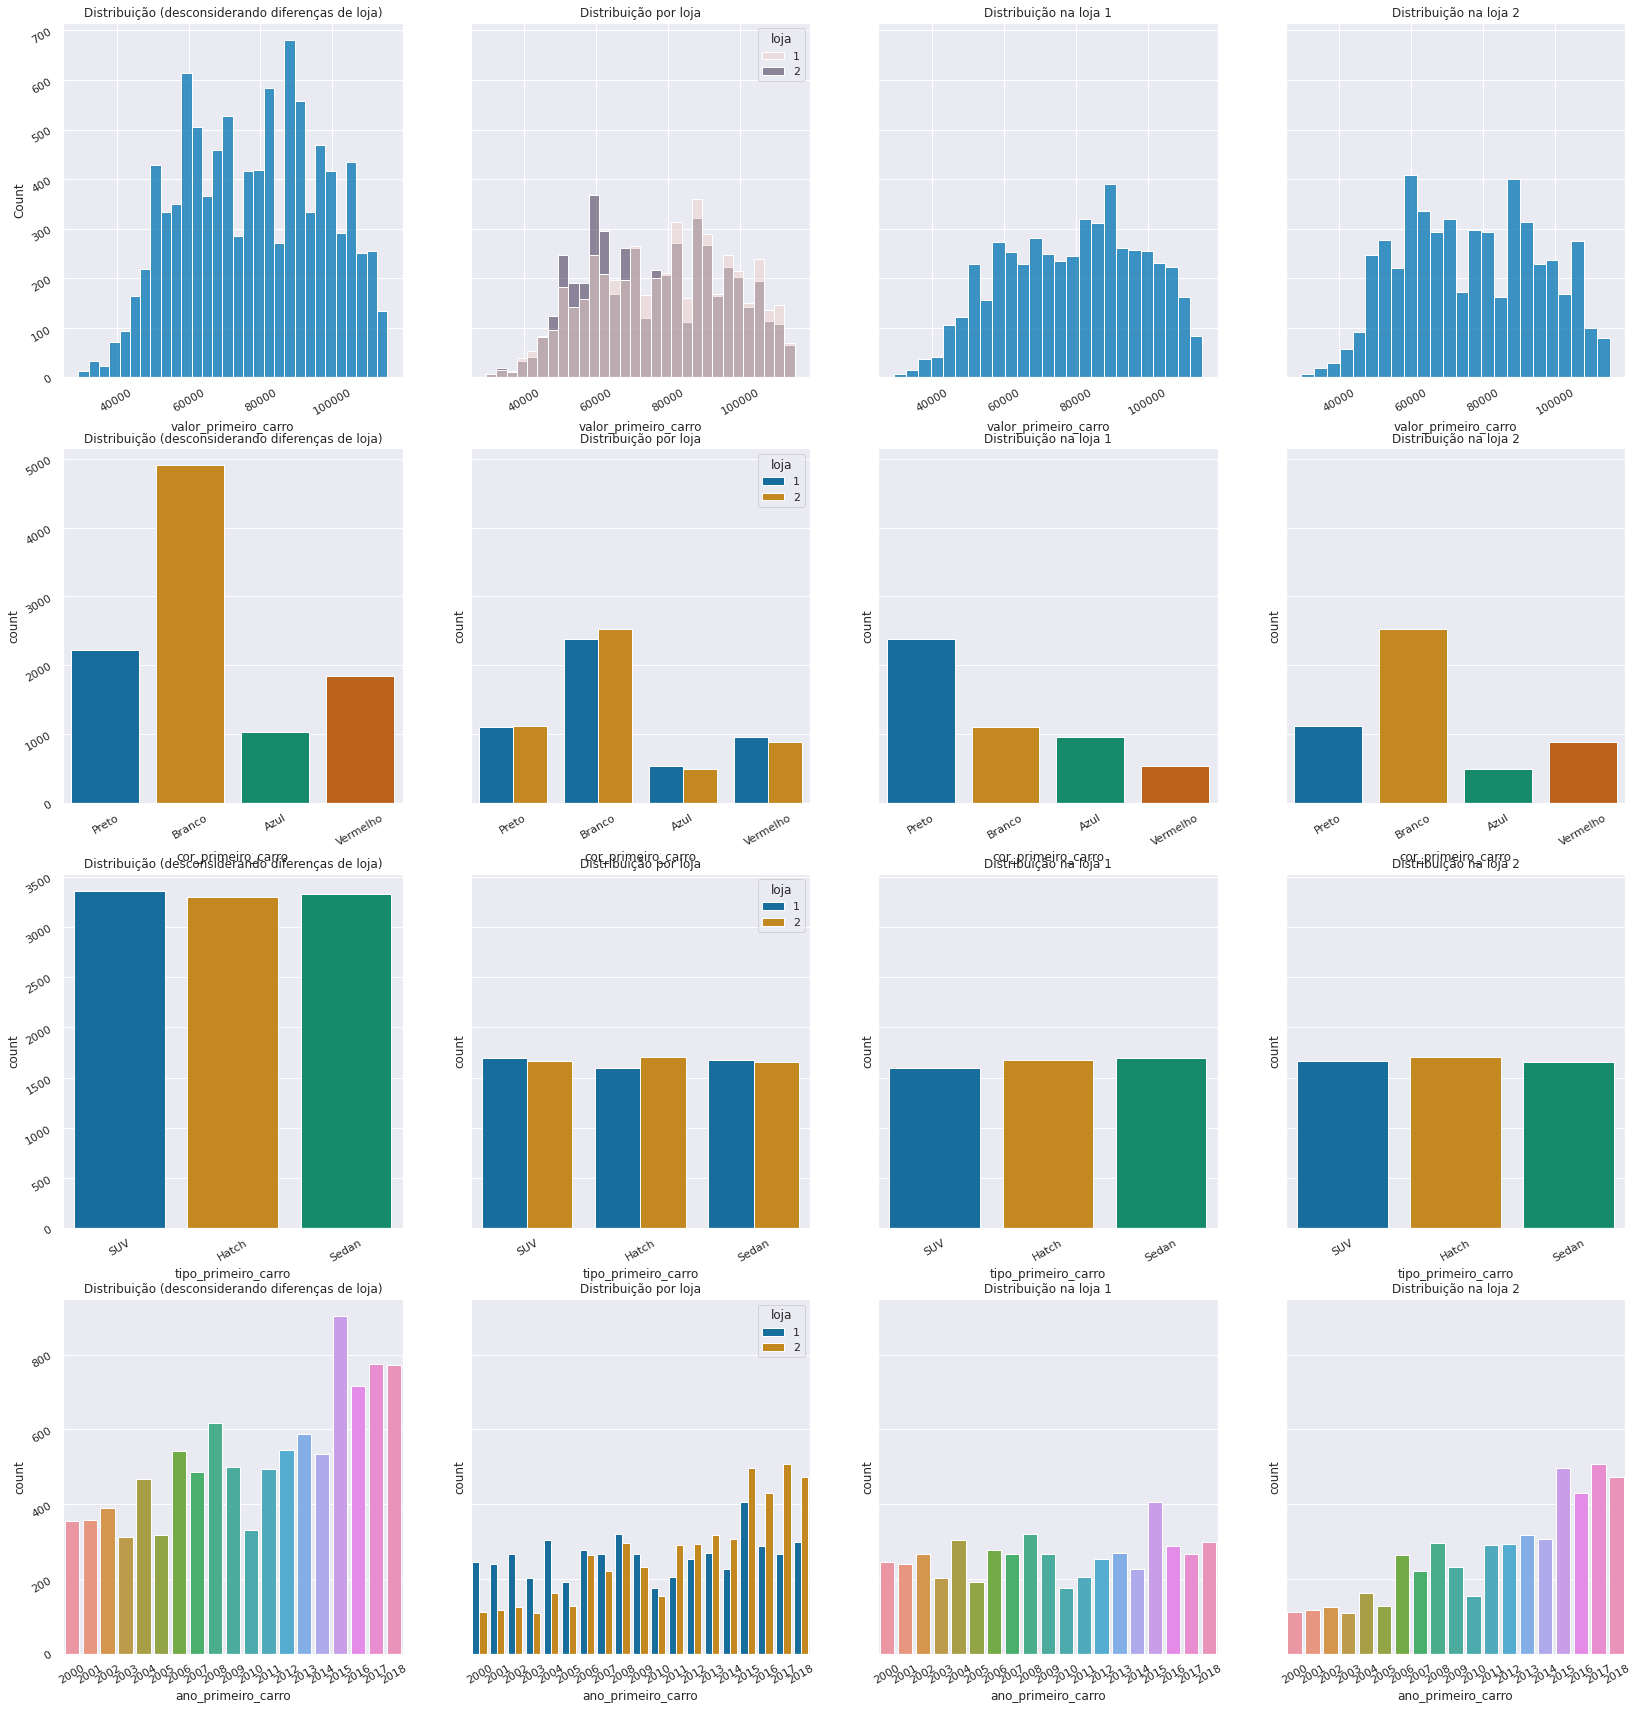

In [131]:
def plotPropertyPerStore(data, axes, col, plot):
    plot(data=data, x=col, ax=axes[0])
    axes[0].set_title('Distribuição (desconsiderando diferenças de loja)')
    axes[0].tick_params(rotation=30)

    plot(data=data, x=col, hue='loja', ax=axes[1])
    axes[1].set_title('Distribuição por loja')
    axes[1].tick_params(rotation=30)

    plot(data=data[data.loja == 1], x=col, ax=axes[2])
    axes[2].set_title('Distribuição na loja 1')
    axes[2].tick_params(rotation=30)

    plot(data=data[data.loja == 2], x=col, ax=axes[3])
    axes[3].set_title('Distribuição na loja 2')
    axes[3].tick_params(rotation=30)


fig, axes = plt.subplots(4, 4, figsize=(28, 30), sharex='row', sharey='row')
plotPropertyPerStore(data, axes[0], 'valor_primeiro_carro', sns.histplot)
plotPropertyPerStore(data, axes[1], 'cor_primeiro_carro', sns.countplot)
plotPropertyPerStore(data, axes[2], 'tipo_primeiro_carro', sns.countplot)
plotPropertyPerStore(data, axes[3], 'ano_primeiro_carro', sns.countplot)

A partir dos gráficos acima, é possível tirar algumas conclusões:
- Não há diferença significativa entre as __cores__ e os __tipos__ dos carros entre as lojas 1 e 2, indicando que os carros ofertados são, à primeira vista, os mesmos entre as lojas.
- Não há diferença significativa entre os __valores__ dos carros das lojas 1 e 2.
- Existe, contudo, diferença entre os __anos__ dos carros nas lojas 1 e 2. A loja 1 tem uma distribuição mais uniforme, enquanto a loja 2 tem, predominantemente, carros mais novos (ano >= 2015), e menos carros mais antigos.

### A política de precificação de carros de acordo com o ano é a mesma nas duas lojas?
Há a suspeita de que carros novos são mais valorizados. Mas as duas lojas refletem essa valorização nos preços?

Para responder essas pergunta, faremos boxplots dos preços dos carros categorizados em cada ano; Vamos plotar também a média e a mediana, e diferenciar os gráficos de acordo com a loja.

Text(0.5, 1.0, 'Distribuição de preço por ano em cada loja')

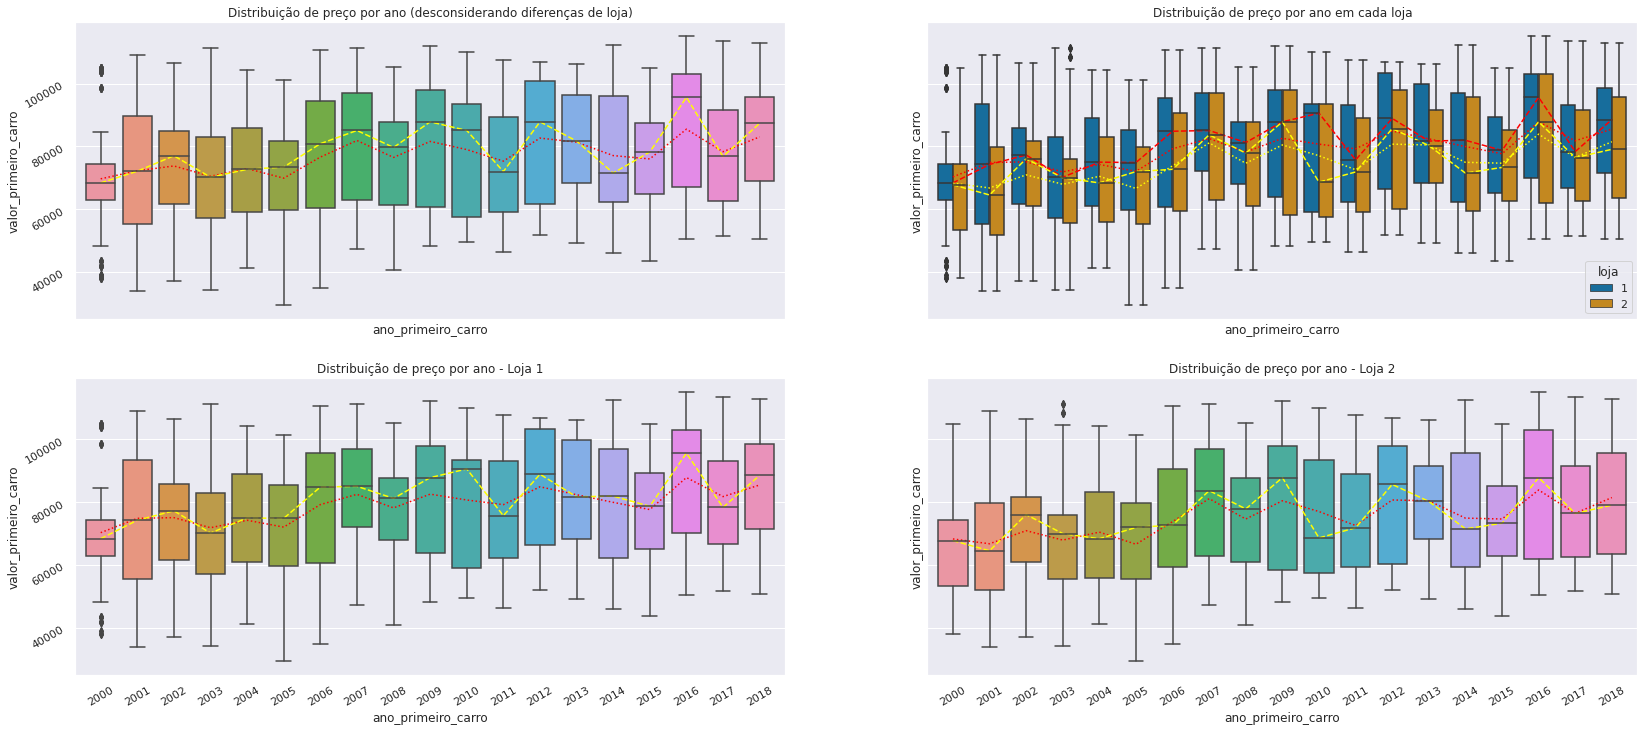

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(28, 12), sharex=True, sharey=True)

def plotPricePerYear(data, ax):
    sns.boxplot(x='ano_primeiro_carro', y='valor_primeiro_carro', data=data, ax=ax)
    ax.tick_params(rotation=30)

    a = data.groupby('ano_primeiro_carro')['valor_primeiro_carro'].mean()
    ax.plot(a.values, color='red', ls='dotted')

    m = data.groupby('ano_primeiro_carro')['valor_primeiro_carro'].median()
    ax.plot(m.values, color='yellow', ls='dashed')
    

plotPricePerYear(data, axes[0][0])
axes[0][0].set_title('Distribuição de preço por ano (desconsiderando diferenças de loja)')

plotPricePerYear(data[data.loja == 1], axes[1][0])
axes[1][0].set_title('Distribuição de preço por ano - Loja 1')

plotPricePerYear(data[data.loja == 2], axes[1][1])
axes[1][1].set_title('Distribuição de preço por ano - Loja 2')

# PLOT[0][1] - Mesmo gráfico para as duas lojas
sns.boxplot(x='ano_primeiro_carro', y='valor_primeiro_carro', data=data, ax=axes[0][1], hue='loja')
axes[0][1].tick_params(rotation=30)

a = data[data.loja==1].groupby('ano_primeiro_carro')['valor_primeiro_carro'].mean()
axes[0][1].plot(a.values, color='red', linestyle='dotted')

m = data[data.loja==1].groupby('ano_primeiro_carro')['valor_primeiro_carro'].median()
axes[0][1].plot(m.values, color='red', linestyle='dashed')

a = data[data.loja==2].groupby('ano_primeiro_carro')['valor_primeiro_carro'].mean()
axes[0][1].plot(a.values, color='yellow', linestyle='dotted')

m = data[data.loja==2].groupby('ano_primeiro_carro')['valor_primeiro_carro'].median()
axes[0][1].plot(m.values, color='yellow', linestyle='dashed')

axes[0][1].set_title('Distribuição de preço por ano em cada loja')

As linhas pontilhadas mostram as médias de preço, e as linhas tracejadas mostram as medianas.

Ao tentar responder à pergunta sobre a política de precificação de carros de acordo com o ano, os gráficos ainda nos confirmam uma suspeita levantada anteriormente: Carros mais novos tendem a ser mais valorizados.

Além disso, o gráfico 2 (Distribuição de preço por ano em cada loja) mostra uma singela diferença na precificação dos carros em cada uma das duas lojas. As linhas amarelas são referentes à loja 2, e as linhas vermelhas são referentes às lojas 1. O gráfico mostra que a loja 2 tem preços consistentemente inferiores à loja 1. Vamos fazer um outro plot para visualizar essa diferença melhor.

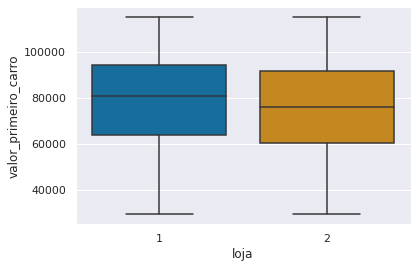

In [133]:
sns.boxplot(data=data, x='loja', y='valor_primeiro_carro')

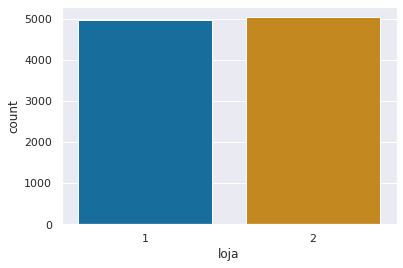

In [159]:
sns.countplot(data=data, x='loja')


Sumarizando as informações, concluímos que
- As lojas tem aproximadamente os mesmos tipos de carros;
- As lojas tem aproximadamente o mesmo número de visitantes;
- A loja 2 tem mais carros novos e menos carros antigos;
- A loja 1 tem carros igualmente distribuídos por ano;
- A loja 2 tem preços mais baixos de carros.

Essas são algumas diferenças significativas entre cada uma das lojas. Note, contudo, que as análises foram feitas sobre o primeiro carro visto por cada negociante. Vamos analisar agora quais carros são efetivamente comprados em cada uma das lojas.

### E na quantidade de carros comprados? Há diferença entre as lojas?
Se as duas lojas são igualmente populares, e a loja 2 tem preços mais baixos, uma conclusão possível de se tirar é que a loja 2 vende mais que a loja 1. Vamos usar histogramas para verificar se essa tendência se confirma.

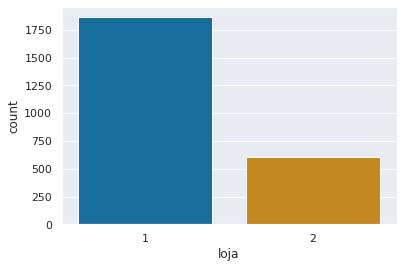

In [161]:
sns.countplot(data=data[data.carro_foi_comprado], x='loja')

Text(0.5, 1.0, 'Distribuição na loja 2')

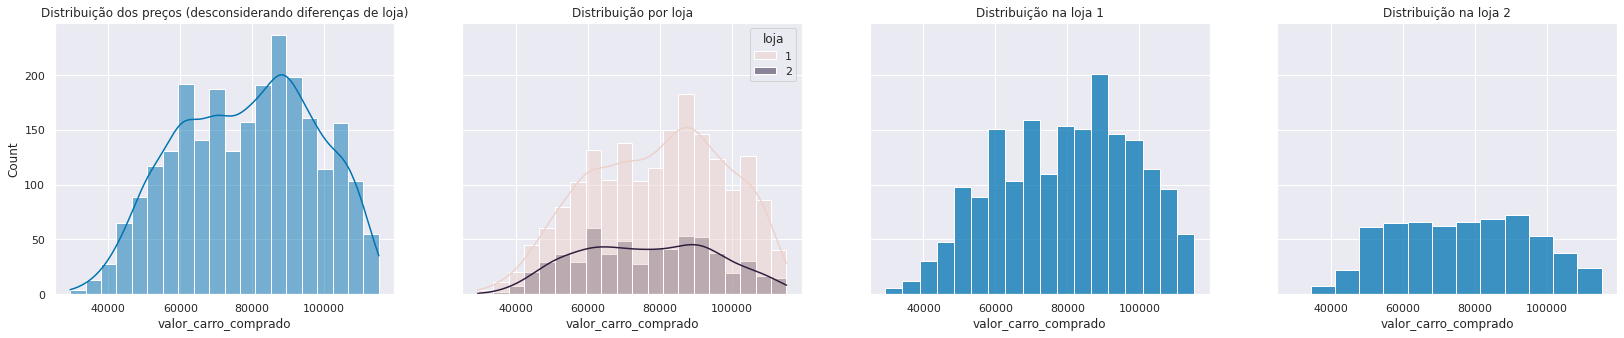

In [135]:
fig, axes = plt.subplots(1, 4, figsize=(28, 5), sharex=True, sharey=True)

sns.histplot(data=data, x='valor_carro_comprado', ax=axes[0], kde=True)
axes[0].set_title('Distribuição dos preços (desconsiderando diferenças de loja)')

sns.histplot(data=data, x='valor_carro_comprado', hue='loja', ax=axes[1], kde=True)
axes[1].set_title('Distribuição por loja')

sns.histplot(data=data[data.loja == 1], x='valor_carro_comprado', ax=axes[2])
axes[2].set_title('Distribuição na loja 1')

sns.histplot(data=data[data.loja == 2], x='valor_carro_comprado', ax=axes[3])
axes[3].set_title('Distribuição na loja 2')

Os gráficos acima nos mostram claramente que a conclusão é falsa, e a loja 1, na verdade, é a loja que mais vende. Preço e popularidade não são os únicos fatores que influenciam na quantidade de vendas de uma loja. Devemos, portanto, investigar quais outros fatores são diferentes entre as lojas.

### O atendimento é diferente entre as lojas?
Para responder essa pergunta, vamos avaliar os parâmetros _entrou_nos_carros_ e _tempo_atendimento_ com um boxplot e um histograma.

Text(0.5, 1.0, 'Tempo de atendimento x entrou nos carros')

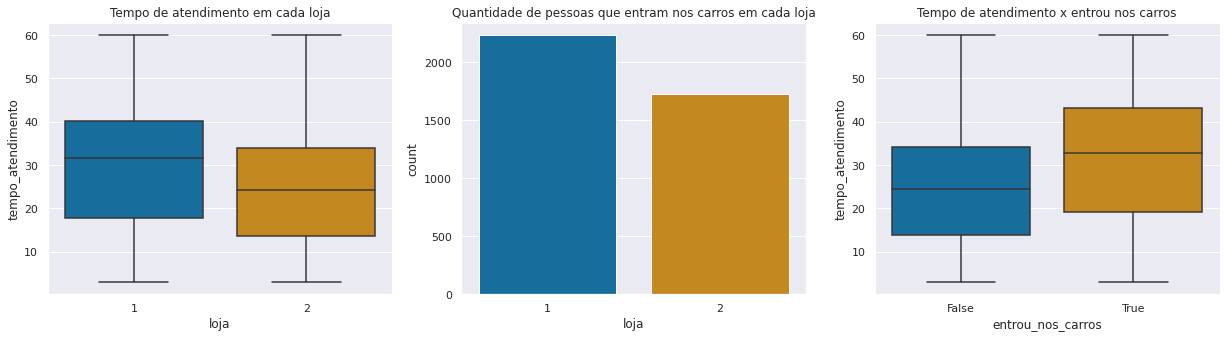

In [136]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
sns.boxplot(data=data, x='loja', y='tempo_atendimento', ax=axes[0])
axes[0].set_title('Tempo de atendimento em cada loja')

sns.countplot(data=data[data['entrou_nos_carros']], x='loja', ax=axes[1])
axes[1].set_title('Quantidade de pessoas que entram nos carros em cada loja')

sns.boxplot(data=data, x='entrou_nos_carros', y='tempo_atendimento', ax=axes[2])
axes[2].set_title('Tempo de atendimento x entrou nos carros')

Os gráficos dizem que o atendimento da loja 1 demora mais tempo, e as pessoas entram mais no carro.
Além disso, o terceiro gráfico sugere que o fato de entrar nos carros afeta o tempo de atendimento: Pessoas que entram nos carros tendem a ficar mais tempo na loja. Seguiremos explorando essa ideia com a seguinte pergunta:

### O tempo de atendimento e entrar nos carros influencia na compra?
Para responder essa pergunta, vamos usar o atributo _carro_foi_comprado_, e plotar um boxplot para ver a distribuição do tempo de atendimento. Faremos também um histograma diferenciando a compra pelo atributo _entrou_nos_carros_.

Text(0.5, 1.0, 'Quantidade de compras diferenciadas pelo atributo entrou_nos_carros')

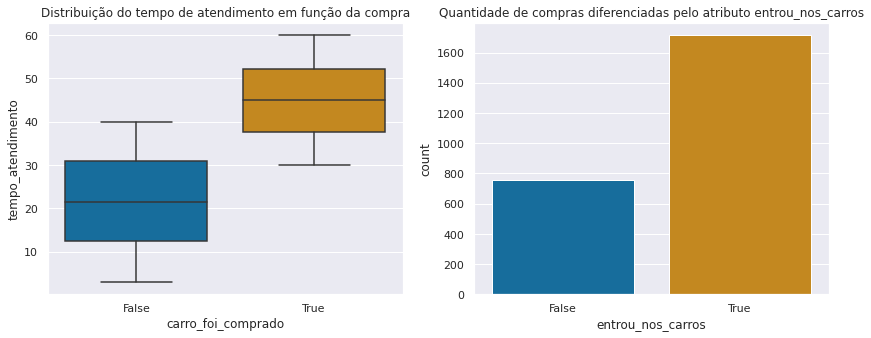

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=data, x='carro_foi_comprado', y='tempo_atendimento', ax=axes[0])
axes[0].set_title('Distribuição do tempo de atendimento em função da compra')

sns.countplot(data=data[data.carro_foi_comprado], x='entrou_nos_carros', ax=axes[1])
axes[1].set_title('Quantidade de compras diferenciadas pelo atributo entrou_nos_carros')

Os gráficos indicam que tanto o tempo de atendimento quanto o fato de entrar nos carros influenciam fortemente a compra. Assim, é possível começar a traçar um perfil de atendimento que atinge uma melhor eficácia de vendas.
Em outras palavras, compras têndem a ter  sucesso quando o atendimento é longo e o negociante entra nos carros.

Vamos seguir explorando diferenças entre as lojas sob uma outra perspectiva: o negociante

### É possível traçar um perfil de negociante? Esse perfil é diferente entre as lojas?
Começaremos agora a usar os atributos referentes ao negociante: _vestimenta_negociante_, _sexo_negociante_, _idade_negociante_, _cor_cabelo_negociante_, _gesticula_negociante_ e _n_carros_vistos_

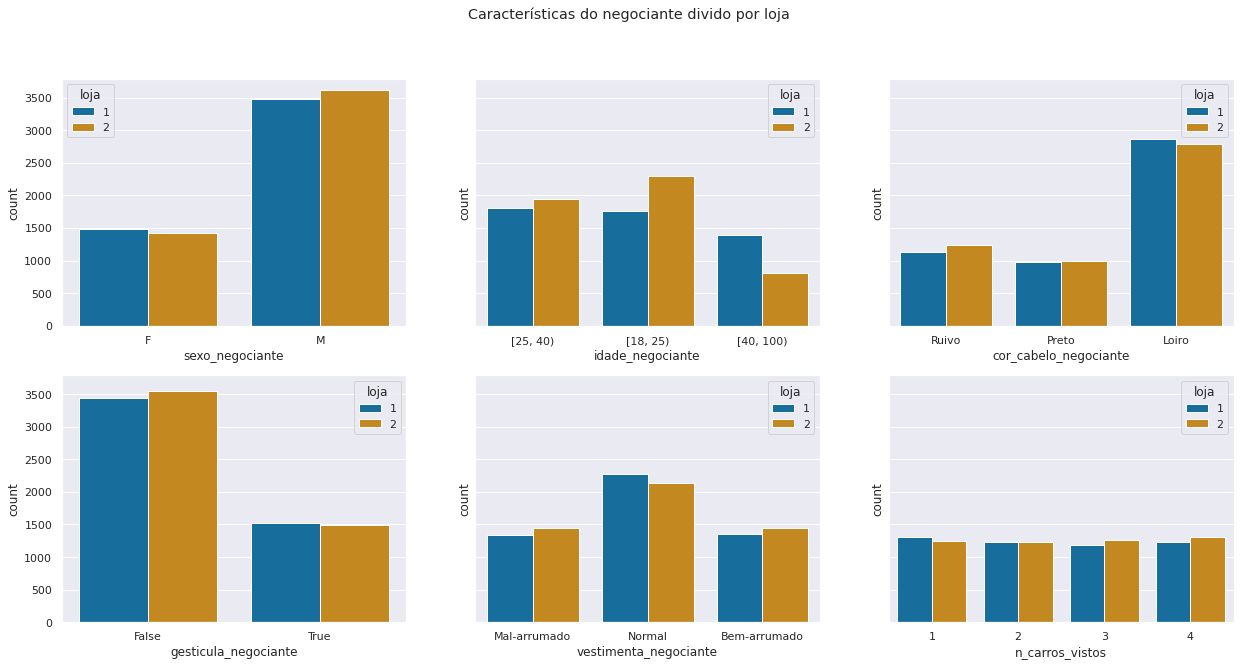

In [138]:
fig, axes = plt.subplots(2, 3, figsize=(21, 10), sharey=True)
fig.suptitle('Características do negociante divido por loja')
sns.countplot(data=data, x='sexo_negociante', hue='loja', ax = axes[0,0])
sns.countplot(data=data, x='idade_negociante', hue='loja', ax = axes[0,1])
sns.countplot(data=data, x='cor_cabelo_negociante', hue='loja', ax = axes[0,2])
sns.countplot(data=data, x='gesticula_negociante', hue='loja', ax = axes[1,0])
sns.countplot(data=data, x='vestimenta_negociante', hue='loja', ax = axes[1,1])
sns.countplot(data=data, x='n_carros_vistos', hue='loja', ax = axes[1,2])

A partir desses gráficos, vemos que o perfil de negociante é bem similar entre as duas lojas - exceto quanto à idade do negociante. Vamos explorar mais a fundo esses dados.

Text(0.5, 1.0, 'Distribuição de idade - Loja 2')

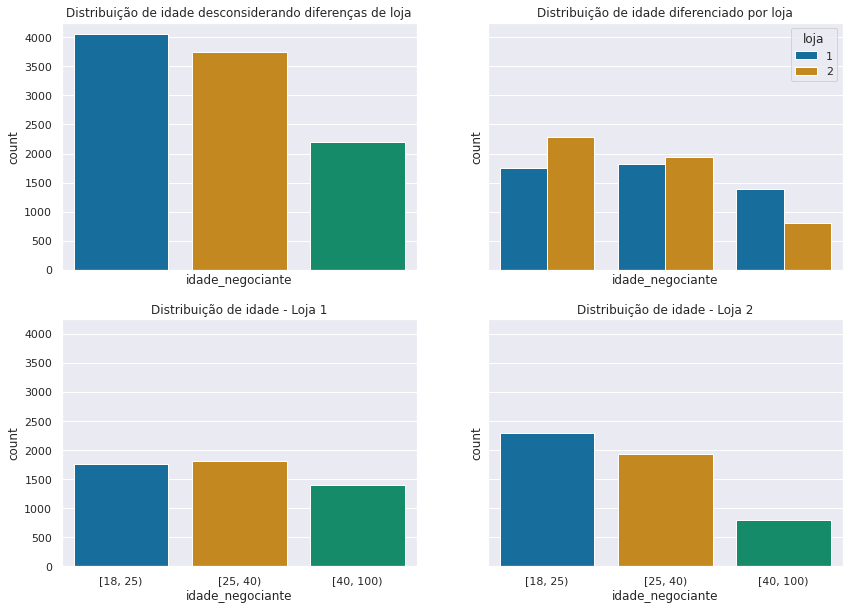

In [139]:
order = data['idade_negociante'].value_counts().index

fix, axes = plt.subplots(2,2, figsize=(14, 10), sharey=True, sharex=True)
sns.countplot(data=data, x='idade_negociante', ax=axes[0,0], order=order)
axes[0,0].set_title('Distribuição de idade desconsiderando diferenças de loja')

sns.countplot(data=data, x='idade_negociante', hue='loja', ax=axes[0,1], order=order)
axes[0,1].set_title('Distribuição de idade diferenciado por loja')

sns.countplot(data=data[data.loja == 1], x='idade_negociante', ax=axes[1,0], order=order)
axes[1,0].set_title('Distribuição de idade - Loja 1')

sns.countplot(data=data[data.loja == 2], x='idade_negociante', ax=axes[1,1], order=order)
axes[1,1].set_title('Distribuição de idade - Loja 2')

Os gráficos indicam que a idade dos negociantes da loja 1 distribuem de forma mais uniforme, enquanto, na loja 2, os negociantes são majoritariamente mais novos. Vamos explorar seguir explorando o atributo de idade.

### A idade influencia no tipo de carro que os negociantes preferem?
Para responder à essa pergunta, vamos explorar os tipos de carro vistos, diferenciando por idade do negociante. Faremos essa análise também para carros comprados.


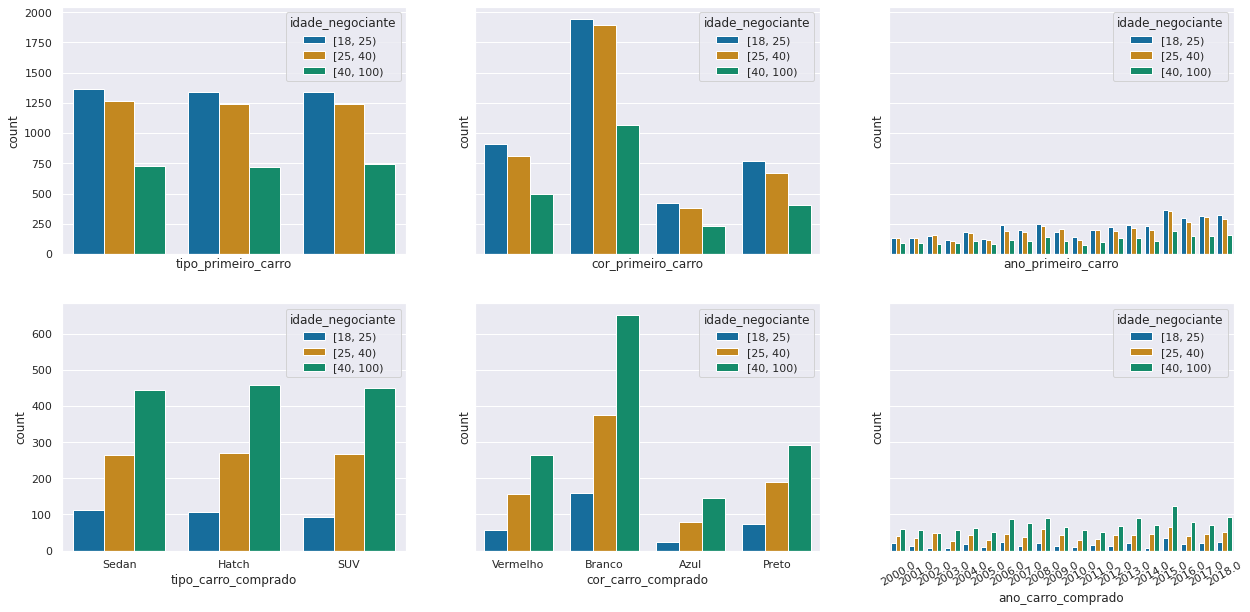

In [168]:
order = data['idade_negociante'].value_counts().index

fig, axes = plt.subplots(2,3, figsize=(21, 10), sharey='row', sharex='col')
sns.countplot(data=data, hue='idade_negociante', x='tipo_primeiro_carro', hue_order=order, ax=axes[0,0])
sns.countplot(data=data, hue='idade_negociante', x='cor_primeiro_carro', hue_order=order, ax=axes[0,1])
sns.countplot(data=data, hue='idade_negociante', x='ano_primeiro_carro', hue_order=order, ax=axes[0,2])
axes[0,2].tick_params(rotation=30)

sns.countplot(data=data, hue='idade_negociante', x='tipo_carro_comprado', hue_order=order, ax=axes[1,0])
sns.countplot(data=data, hue='idade_negociante', x='cor_carro_comprado', hue_order=order, ax=axes[1,1])
sns.countplot(data=data, hue='idade_negociante', x='ano_carro_comprado', hue_order=order, ax=axes[1,2])
axes[1,2].tick_params(rotation=30)

Essas análises sugerem que a idade não influencia no tipo de carro comprado. Uma determinada cor, tipo ou ano de carro não é preferido por certa faixa etária.


Contudo, é possível concluir que a idade tem influência sobre o poder de compra: Pessoas mais novas visitam mais as lojas, mas compram menos. Pessoas mais velhas, por outro lado, compram mais, mas visistam menos as lojas.

De todas as análises, é possível tirar diversas conclusões:
1. As lojas 1 e 2 ofertam carros de mesmo tipo e cor; Diferencia-se apenas o ano. A loja 2 tem mais carros novos do que antigos, enquanto a loja 1 tem carros uniformemente distribuídos em todos os anos.
2. Ano do carro afeta o preço - carros mais antigos são mais baratos.
3. A loja 2 tem preços de carros mais baixos do que a loja 1
4. Nas duas lojas, há a mesma quantidade de pessoas.
5. A loja 2 vende menos do que a loja 1 - sugerindo que existem outros parâmetros que afetam nas vendas além de quantidade de pessoas e preço do carro.
6. O atendimento na loja 1 demora mais que a loja 2
7. Mais pessoas entram nos carros na loja 1
8. Negociantes que entram nos carros passam mais tempo no atendimento
9. O fato de entrar no carro e o tempo de atendimento maior são fatores importantes para a compra dos carros
10. As lojas 1 e 2 não tem diferença nos atributos sexo, cor de cabelo, vestimenta, numero de carros vistos e se o negociante gesticula.
11. A idade dos negociantes é distribuída de forma diferente nas lojas 1 e 2: A loja 2 tem mais pessoas mais novas e menos pessoas mais velhas
12. A idade não influencia no tipo de carro que os negociantes vêem, e nem no tipo de carro que os negociantes compram.
13. A idade influencia no sucesso da compra: Pessoas mais novas olham mais os carros, mascompram menos, enquanto que as pessoas mais velhas compram mais carros.

Vale dizer que é possível explorar de forma mais minuciosa os dados para tirar ainda mais conclusões.

Para validação, podemos usar árvore de decisão, uma vez que leva em conta correlações entre parâmetros. Para essa aplicação, o modelo naive-bayes não parece um modelo interessante justamente por ignorar correlações entre modelos.